# Wordcloud Reclamações #

## Introduction ##

Carregamento dos dados. Atenção para os encodings e o separador (;)

In [0]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
#workdir_path = '/content/drive/My Drive' #MODIFICAR!!! #Caminho para o seu workspace
workdir_path = '/content/drive/My Drive/Aula08'
os.chdir(workdir_path)

In [0]:
ls

base_reclamacoes.csv    Estado_wordcloud.png          Servico_wordcloud.png
brasil.jpg              hoteis.arff                   songdata.csv
coffee.csv              hoteis-small.arff             wave.jpg
Empresa1_wordcloud.png  Problema_barplot.png
Empresa_wordcloud.png   recomendação_de_musica.ipynb


In [0]:

data = pd.read_csv('base_reclamacoes.csv', sep=';', encoding="ISO-8859-1")
data.tail()

Regiao   ...        faixa etarea
42302  Sudeste  ...       Nao Informada
42303  Sudeste  ...  entre 31 a 40 anos
42304  Sudeste  ...  entre 21 a 30 anos
42305  Sudeste  ...       Nao Informada
42306  Sudeste  ...  entre 31 a 40 anos

[5 rows x 8 columns]

## Quantidade de linhas e colunas do DataFrame ##





In [0]:
data.shape

(42307, 8)

In [0]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

In [0]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

In [0]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

In [0]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

In [0]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

In [0]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

In [0]:
df_empresa.head

<bound method NDFrame.head of                                                  empresa                            Nome Empresa Sem Espaço
0                                      ITAÚ UNIBANCO S/A                                   ITAÚ_UNIBANCO_SA
1                                              CLARO S/A                                           CLARO_SA
2      ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO  ELETROPAULO_METROPOLITANA_ELETRICIDADE_DE_S_PAULO
3                                GNN GARAGENS LTDA - EPP                             GNN_GARAGENS_LTDA__EPP
4                                              CLARO S/A                                           CLARO_SA
...                                                  ...                                                ...
42302                              B2W COMPANHIA DIGITAL                              B2W_COMPANHIA_DIGITAL
42303                              ADIDAS DO BRASIL LTDA                              ADIDAS_DO_BRASIL_LTD

In [0]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

In [0]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
mas_cobrança_e_reestruturaçao_de_ativos_financeiro       1
mas_informatica_ltda__contato_informática                1
mas_informatica_ltda__me                                 1
masima_incorporações_&_empreedimentos_ltda               1
123_viagem_de_turismo_ltda                               1
Length: 10607, dtype: int64


In [0]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

In [0]:
string_empresas

'itaú_unibanco_sa claro_sa eletropaulo_metropolitana_eletricidade_de_s_paulo gnn_garagens_ltda__epp claro_sa aerovias_del_continente_americano_sa b2w_companhia_digital telefonica_brasil_sa winner_fit_academia superfor_sp_veículos_ltda motorola_mobility_comercio_de_produtos_eletr_ltda portoseg_sa_credito_financiamento_e_investimento banco_pan_sa comercial_zena_móveis_sociedade_ltda bradesco_vida_e_previdencia_sa banco_cetelem_sa sascar_tecnologia_e_segurança_automotiva_sa eletropaulo_metropolitana_eletricidade_de_s_paulo bradesco_autore_companhia_de_seguros banco_pan_sa banco_bmg_sa eletropaulo_metropolitana_eletricidade_de_s_paulo castelo_verde_comercio_de_moveis_ltda__me centro_de_formacao_de_condutores_b_robles_penha_ltda_me medisanitas_brasil_assistencia_integral_a_saúde_sa sicoob_coopercredisp tim_celular_sa lima_negociacoes_financeiras_eireli__me acbz_importação_e_comércio_ltda mobpanda_moveis_e_decoracoes_ltda_epp castelo_verde_comercio_de_moveis_ltda__me oi_móvel_sa ssk_escola_d

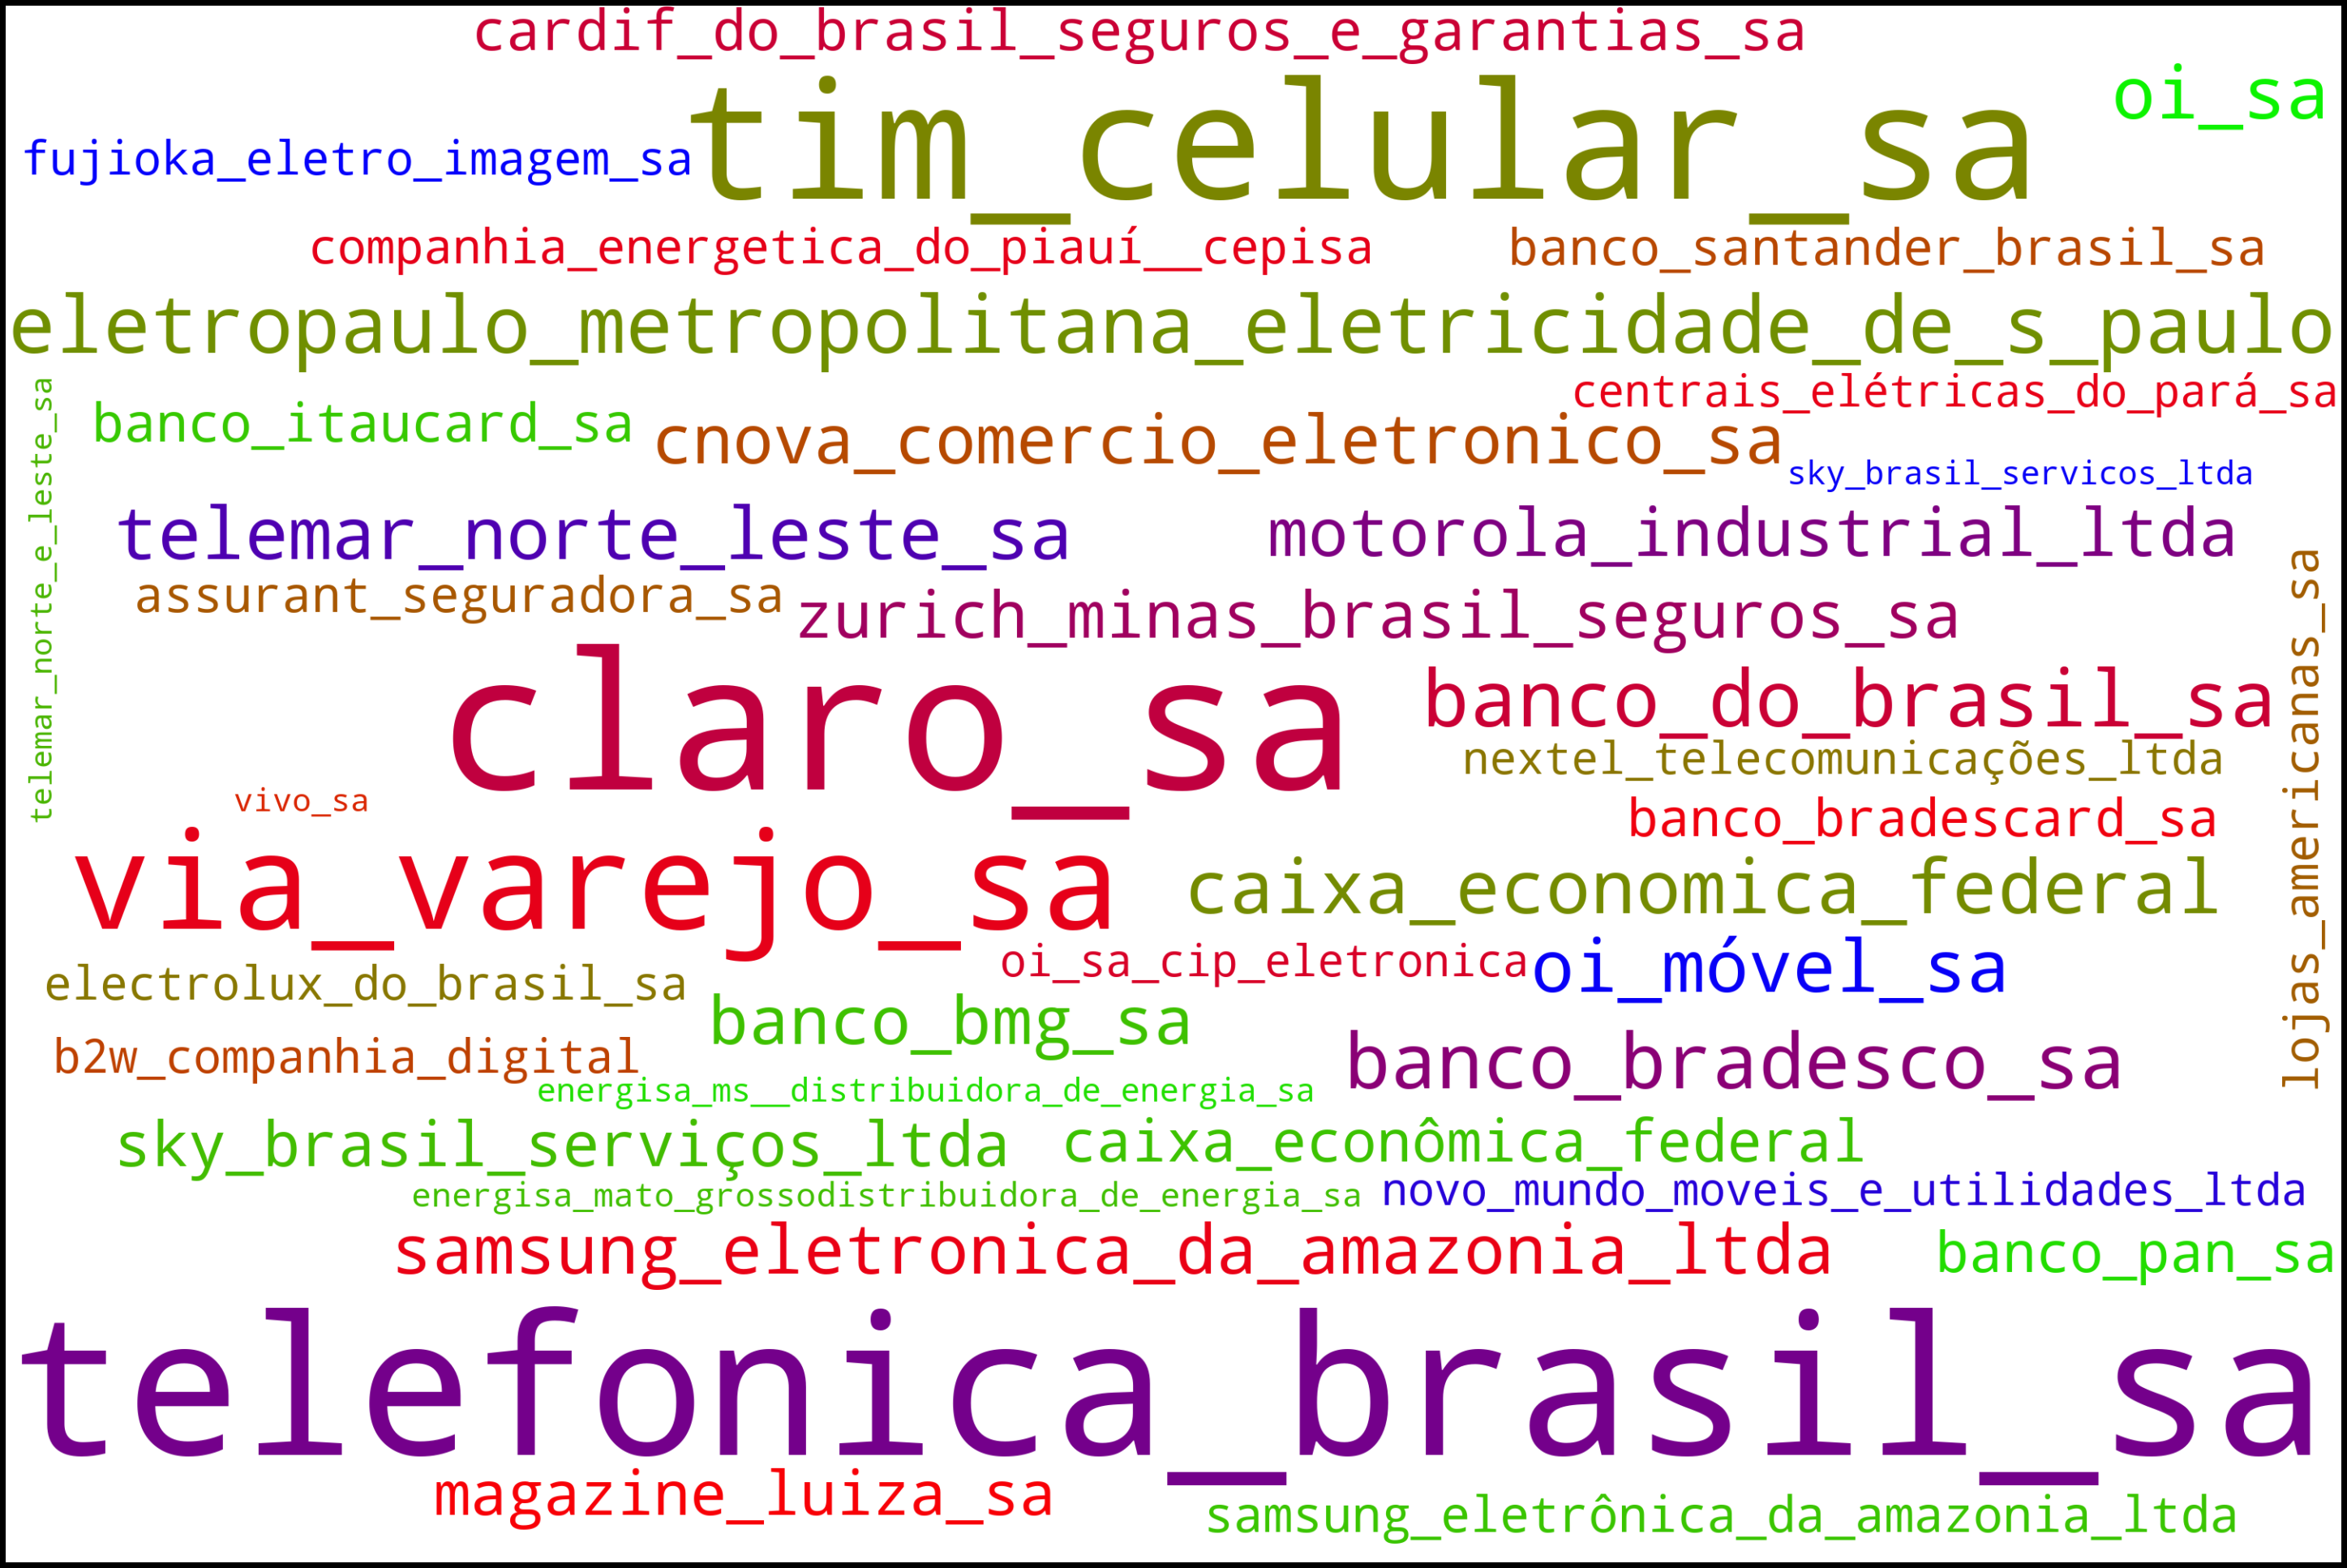

In [0]:
wordcloud_empresas = WordCloud(background_color="white",collocations=False,
                              colormap="brg",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()
#"Oranges_r"

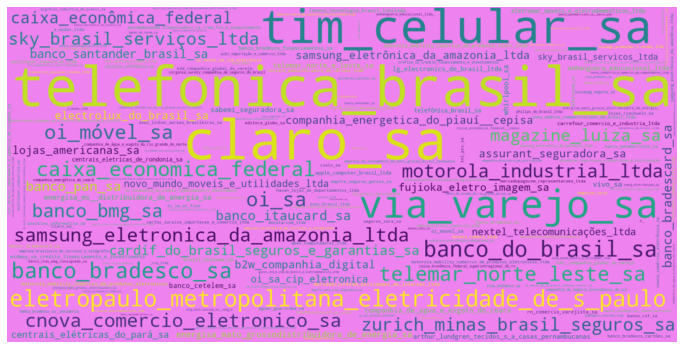

In [0]:
#wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
wordcloud = WordCloud(background_color="violet",collocations=False, width=1600, height=800, max_font_size=200).generate(string_empresas)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud Estado ##

In [0]:
df_estado = pd.DataFrame()
df_estado['estado'] = data['estado']

In [0]:
df_estado.head()

estado
0     sp
1     sp
2     sp
3     sp
4     sp

In [0]:
df_estado["estado"] = df_estado["estado"].str.lower()

In [0]:
print (df_estado.groupby("estado").size().sort_values(ascending=False))

estado
sp    8127
go    7764
ms    4723
rn    4073
mt    3972
mg    3460
pi    2153
ro    2057
sc    1955
ce    1766
es     828
to     567
pa     341
pb     302
ma     126
rs      90
pe       3
dtype: int64


In [0]:
string_estado = " ".join([text for text in df_estado["estado"]])

In [0]:
string_estado

'sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp pa pa pa pa pa pa pa pa pa pa pa pa sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp ro ro ro ro ro ro ro ro ro ro ro ro sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp pa pa pa pa pa ro ro ro ro ro ro pa ro ro ro ro ro ro ro ro ro ro ro ro ma ma ma ro ro ro ro ma ma ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sc sc sc sc sc sc sc sc sc sc sc sc sc ro ro ro ro ro ro ro rn rn ro ro ro rn rn rn rn rn sp sp sp sp sp sp rn rn rn rn rn rn sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp rn ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro rn rn rn rn rn rn rn rn rn rn rn rn rn rn rn ro ro ro ro ro ro ro ro ro ro ro ro ro ro ro 

In [0]:
import mpl_toolkits


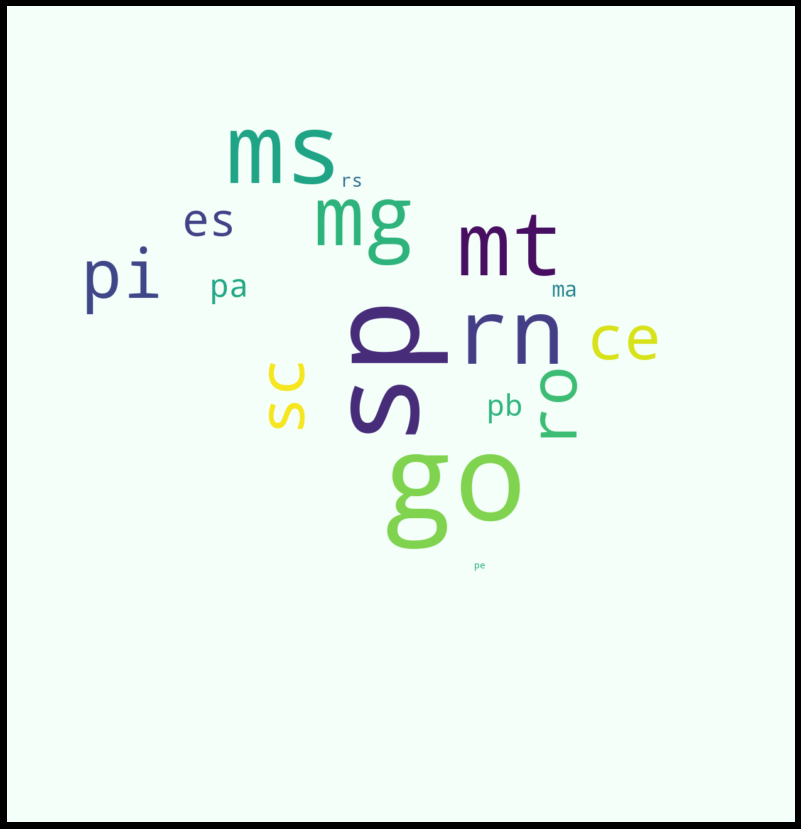

In [0]:

  
# Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)
wave_mask = np.array(Image.open( "brasil.jpg"))
 
# Make the figure
wordcloud = WordCloud(collocations= False,background_color="mintcream",mask=wave_mask).generate(string_estado)
plt.figure(figsize = (25,15),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


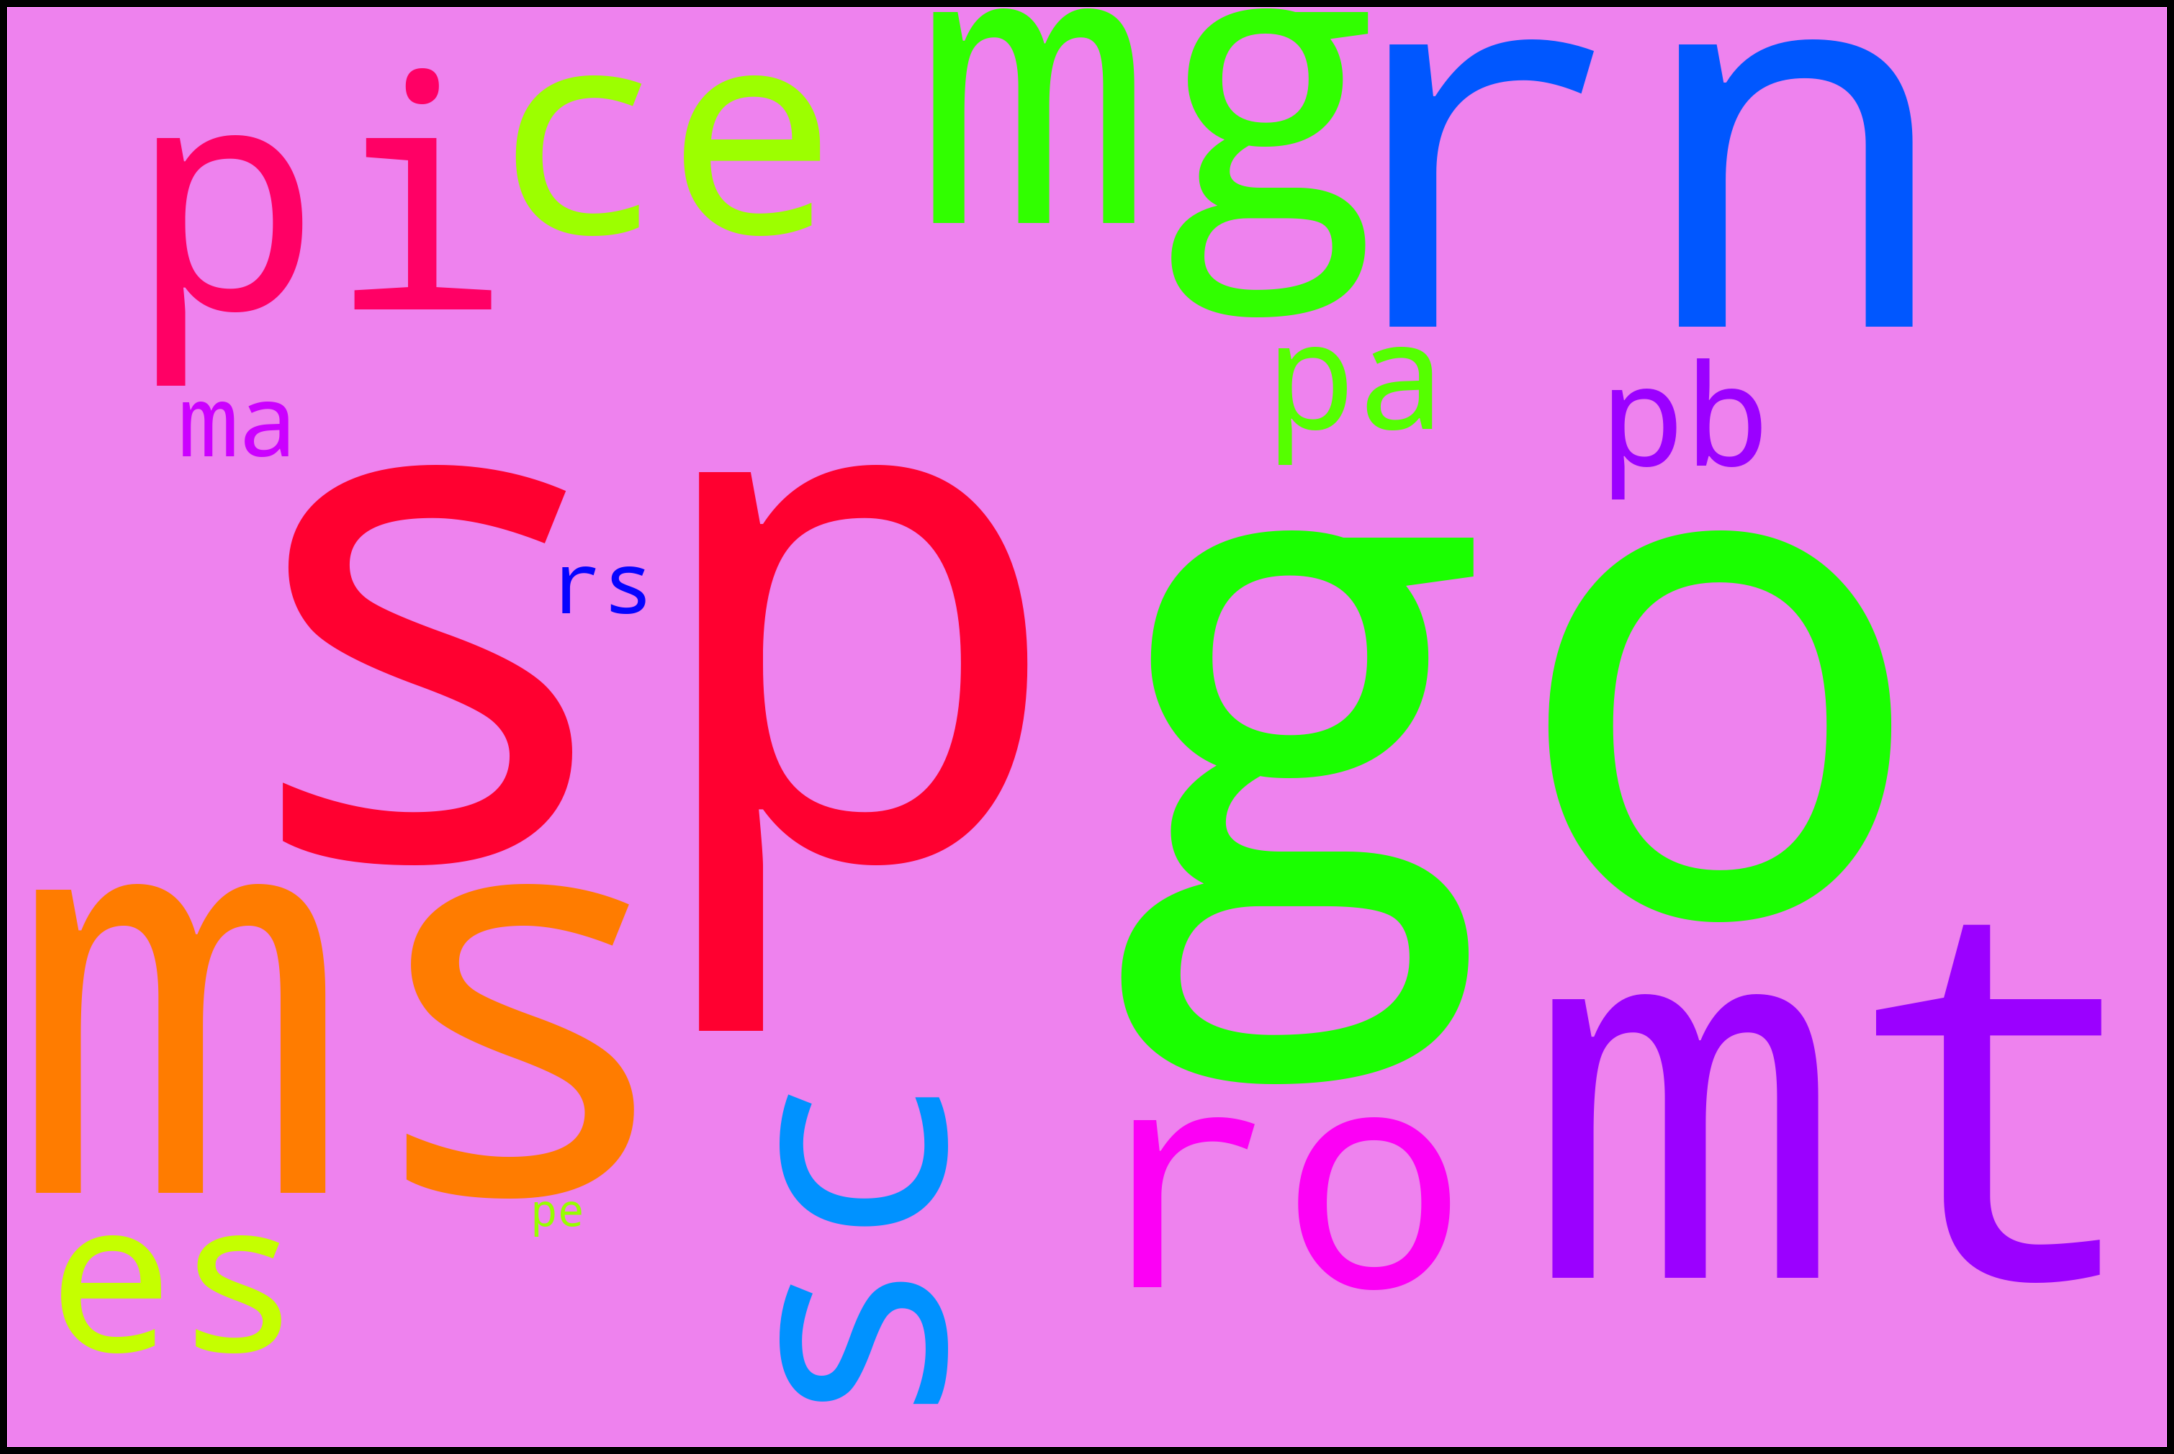

In [0]:
wordcloud_estado = WordCloud(background_color="violet",collocations=False,
                              colormap="hsv",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_estado)
plt.figure(figsize = (30,20),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_estado, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Estado_wordcloud.png")
plt.show()
#"Oranges_r"

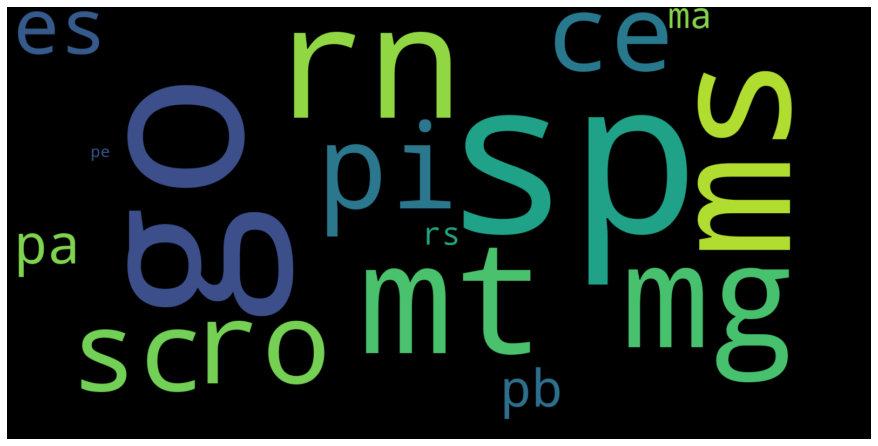

In [0]:

wordcloud = WordCloud(collocations= False,width=1600, height=800, max_font_size=400,max_words=40).generate(string_estado)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()




## Wordcloud Serviço  ##

In [0]:
df_servico = pd.DataFrame()
df_servico['serviço'] = data['serviço']

In [0]:
df_servico.tail()

serviço
42302          Microcomputador / Produtos de Informática
42303                      Vestuário ( Calçado / Roupa )
42304  Acessório Para Vestuário ( Bolsa, Cinto, Chapé...
42305  Agências e Operadoras de viagens (pacotes turí...
42306            Escola ( Pré, 1º, 2º Graus e Superior )

In [0]:

df_servico["Serviço Sem Espaço"] = df_servico.replace({'serviço': dicionario},regex=True)

In [0]:
df_servico.tail()

serviço                                 Serviço Sem Espaço
42302          Microcomputador / Produtos de Informática           Microcomputador__Produtos_de_Informática
42303                      Vestuário ( Calçado / Roupa )                         Vestuário__Calçado__Roupa_
42304  Acessório Para Vestuário ( Bolsa, Cinto, Chapé...  Acessório_Para_Vestuário__Bolsa_Cinto_Chapéu_g...
42305  Agências e Operadoras de viagens (pacotes turí...  Agências_e_Operadoras_de_viagens_pacotes_turís...
42306            Escola ( Pré, 1º, 2º Graus e Superior )                Escola__Pré_1º_2º_Graus_e_Superior_

In [0]:
df_servico["Serviço Sem Espaço"] = df_servico["Serviço Sem Espaço"].str.lower()

In [0]:
df_servico.tail()

serviço                                 Serviço Sem Espaço
42302          Microcomputador / Produtos de Informática           microcomputador__produtos_de_informática
42303                      Vestuário ( Calçado / Roupa )                         vestuário__calçado__roupa_
42304  Acessório Para Vestuário ( Bolsa, Cinto, Chapé...  acessório_para_vestuário__bolsa_cinto_chapéu_g...
42305  Agências e Operadoras de viagens (pacotes turí...  agências_e_operadoras_de_viagens_pacotes_turís...
42306            Escola ( Pré, 1º, 2º Graus e Superior )                escola__pré_1º_2º_graus_e_superior_

In [0]:
print (df_servico.groupby("Serviço Sem Espaço").size().sort_values(ascending=False))

Serviço Sem Espaço
telefone__convencional_celular_interfone_etc_                  5149
telefonia_celular                                              3037
telefonia_fixa__plano_de_expansão__compra_e_venda__locação_    2713
banco_comercial                                                2313
cartão_de_crédito                                              2274
                                                               ... 
charutaria__cigarro_tabaco_cachimbo_etc_                          1
embalagem                                                         1
farináceos_fubá_polvilho_etc                                      1
profissional_liberal__veterinário                                 1
radiochamada__pager                                               1
Length: 193, dtype: int64


In [0]:
string_servico = " ".join([text for text in df_servico["Serviço Sem Espaço"]])

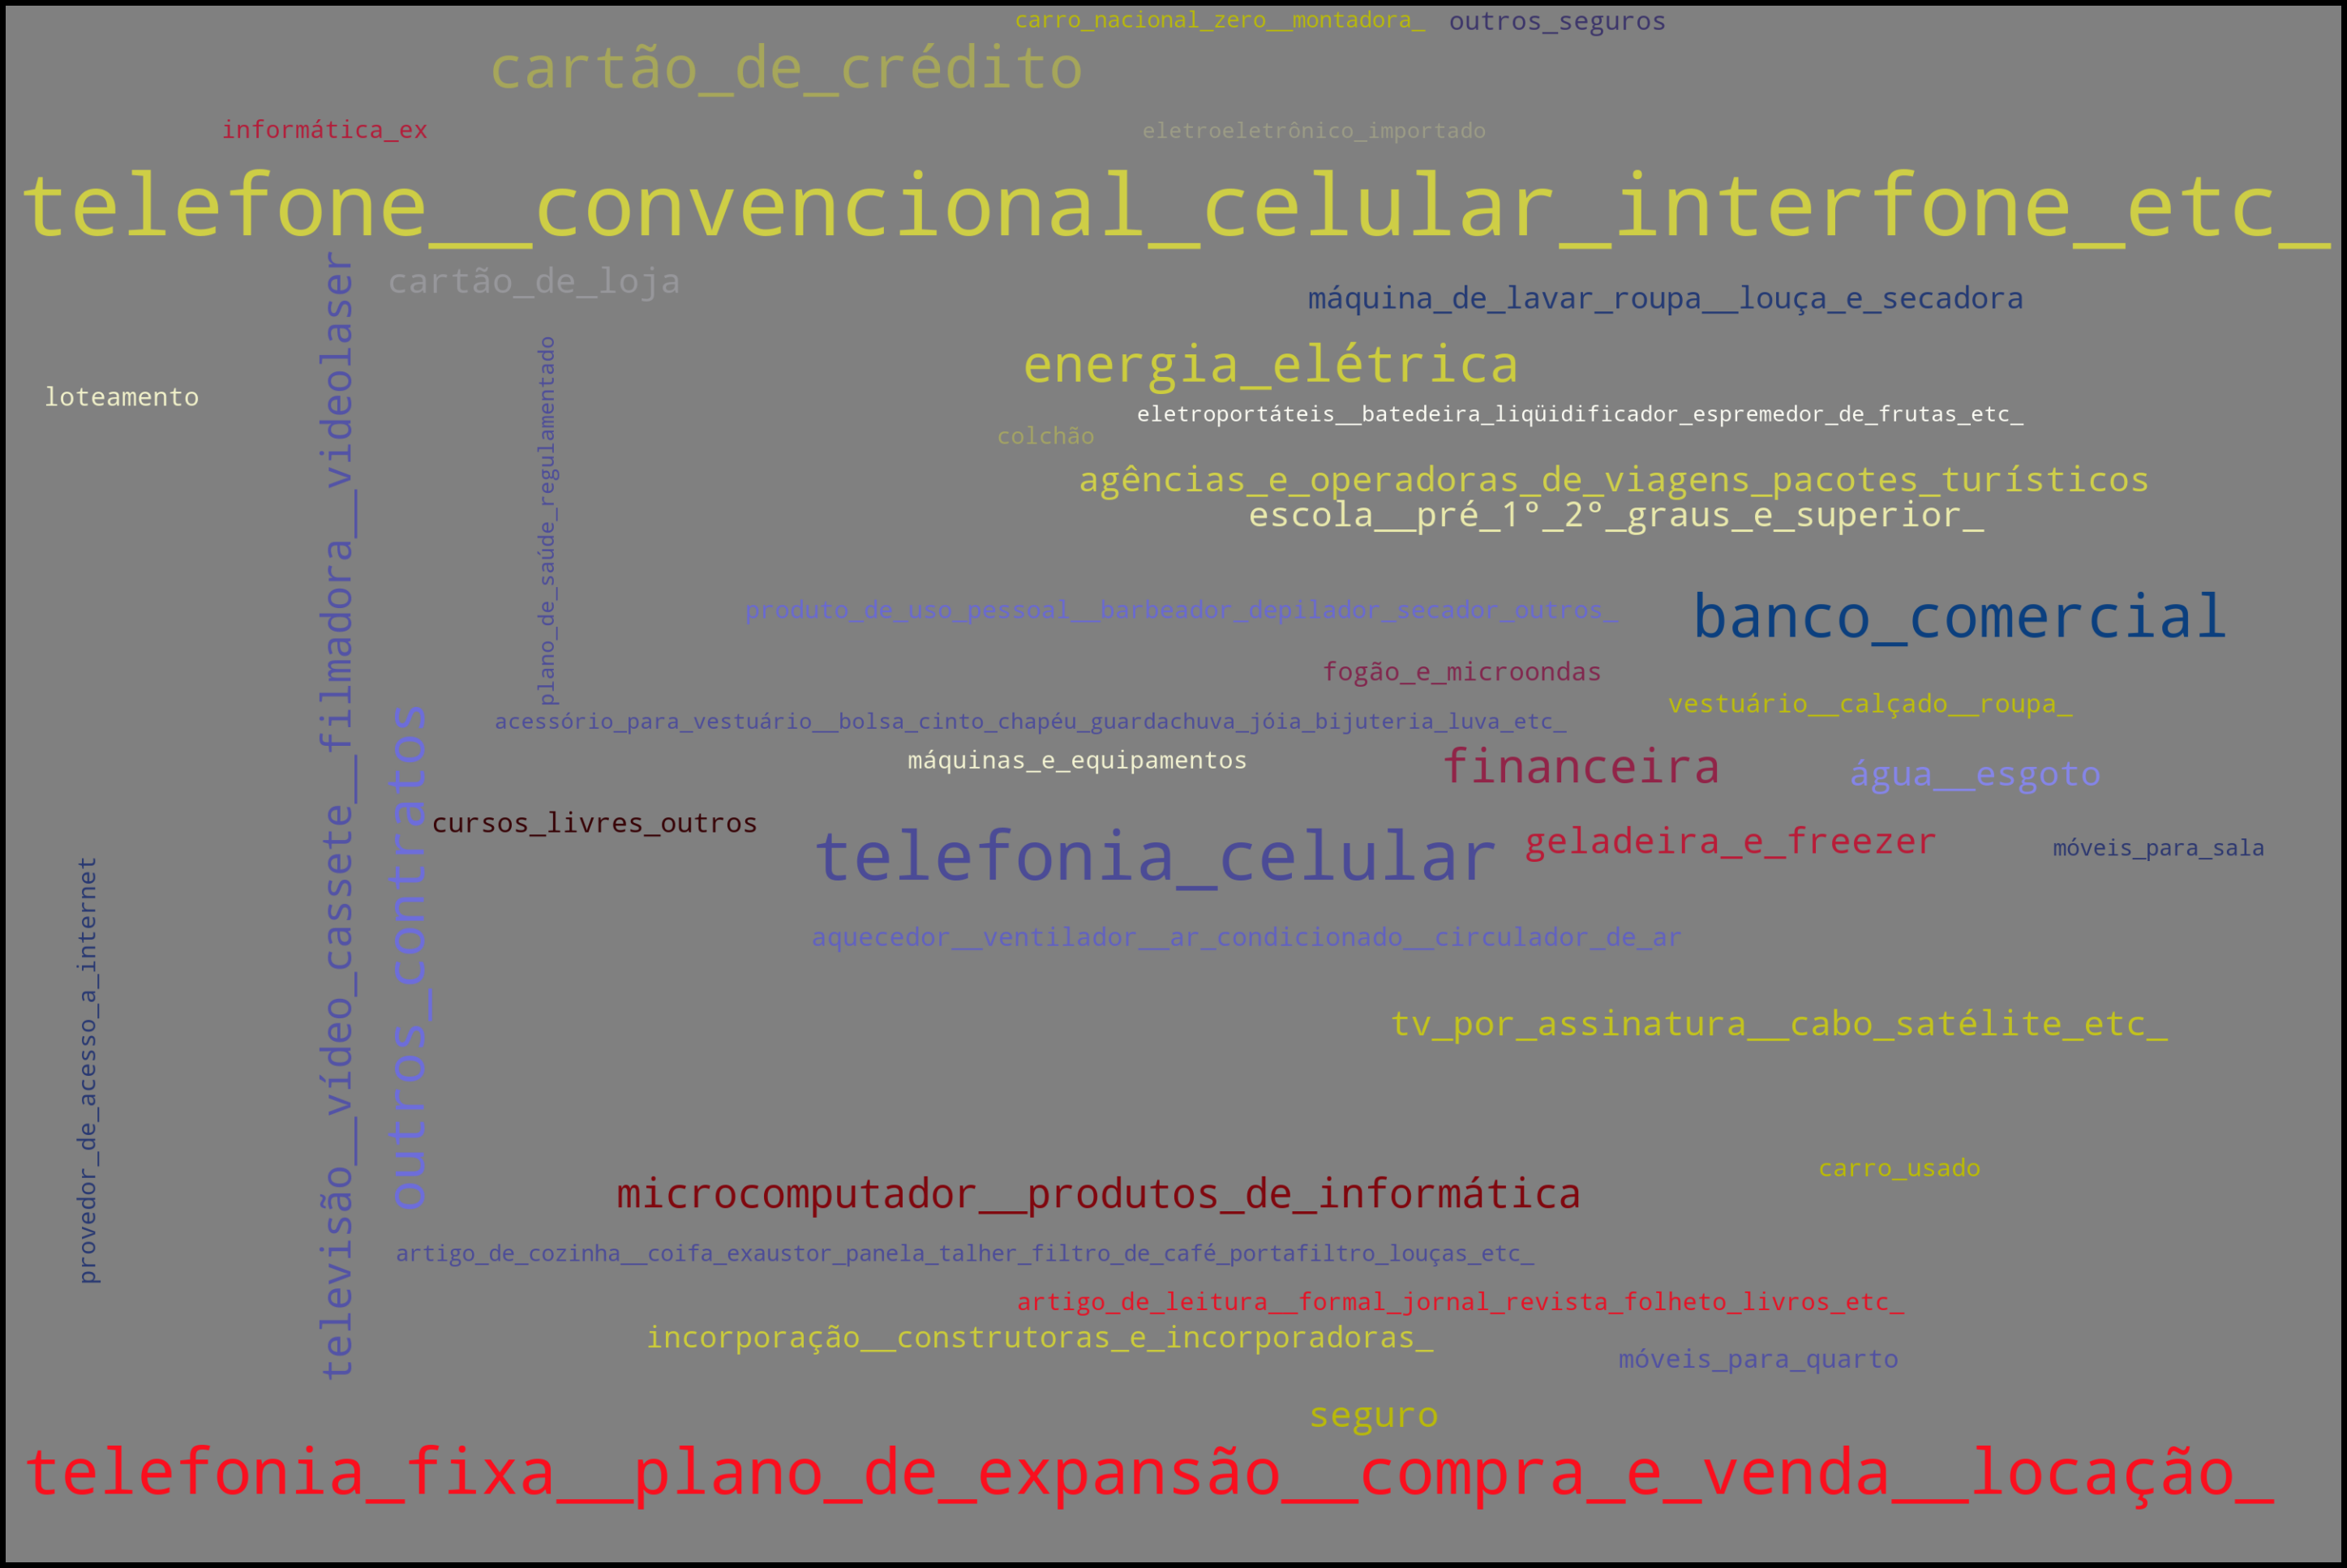

In [0]:
wordcloud_servico = WordCloud(background_color="gray",collocations=False,
                              colormap="gist_stern",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_servico)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_servico, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Servico_wordcloud.png")
plt.show()

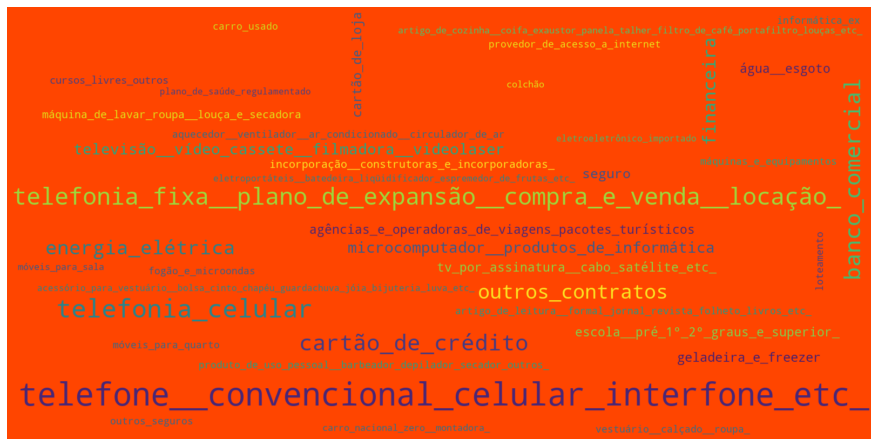

In [0]:
wordcloud = WordCloud(background_color="orangered",collocations= False,width=1600, height=800, max_font_size=400,max_words=40).generate(string_servico)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Avaliar se as wordclouds mudam sem os problemas null ##

In [0]:
df_problema = pd.DataFrame()
df_problema['problema'] = data['problema']

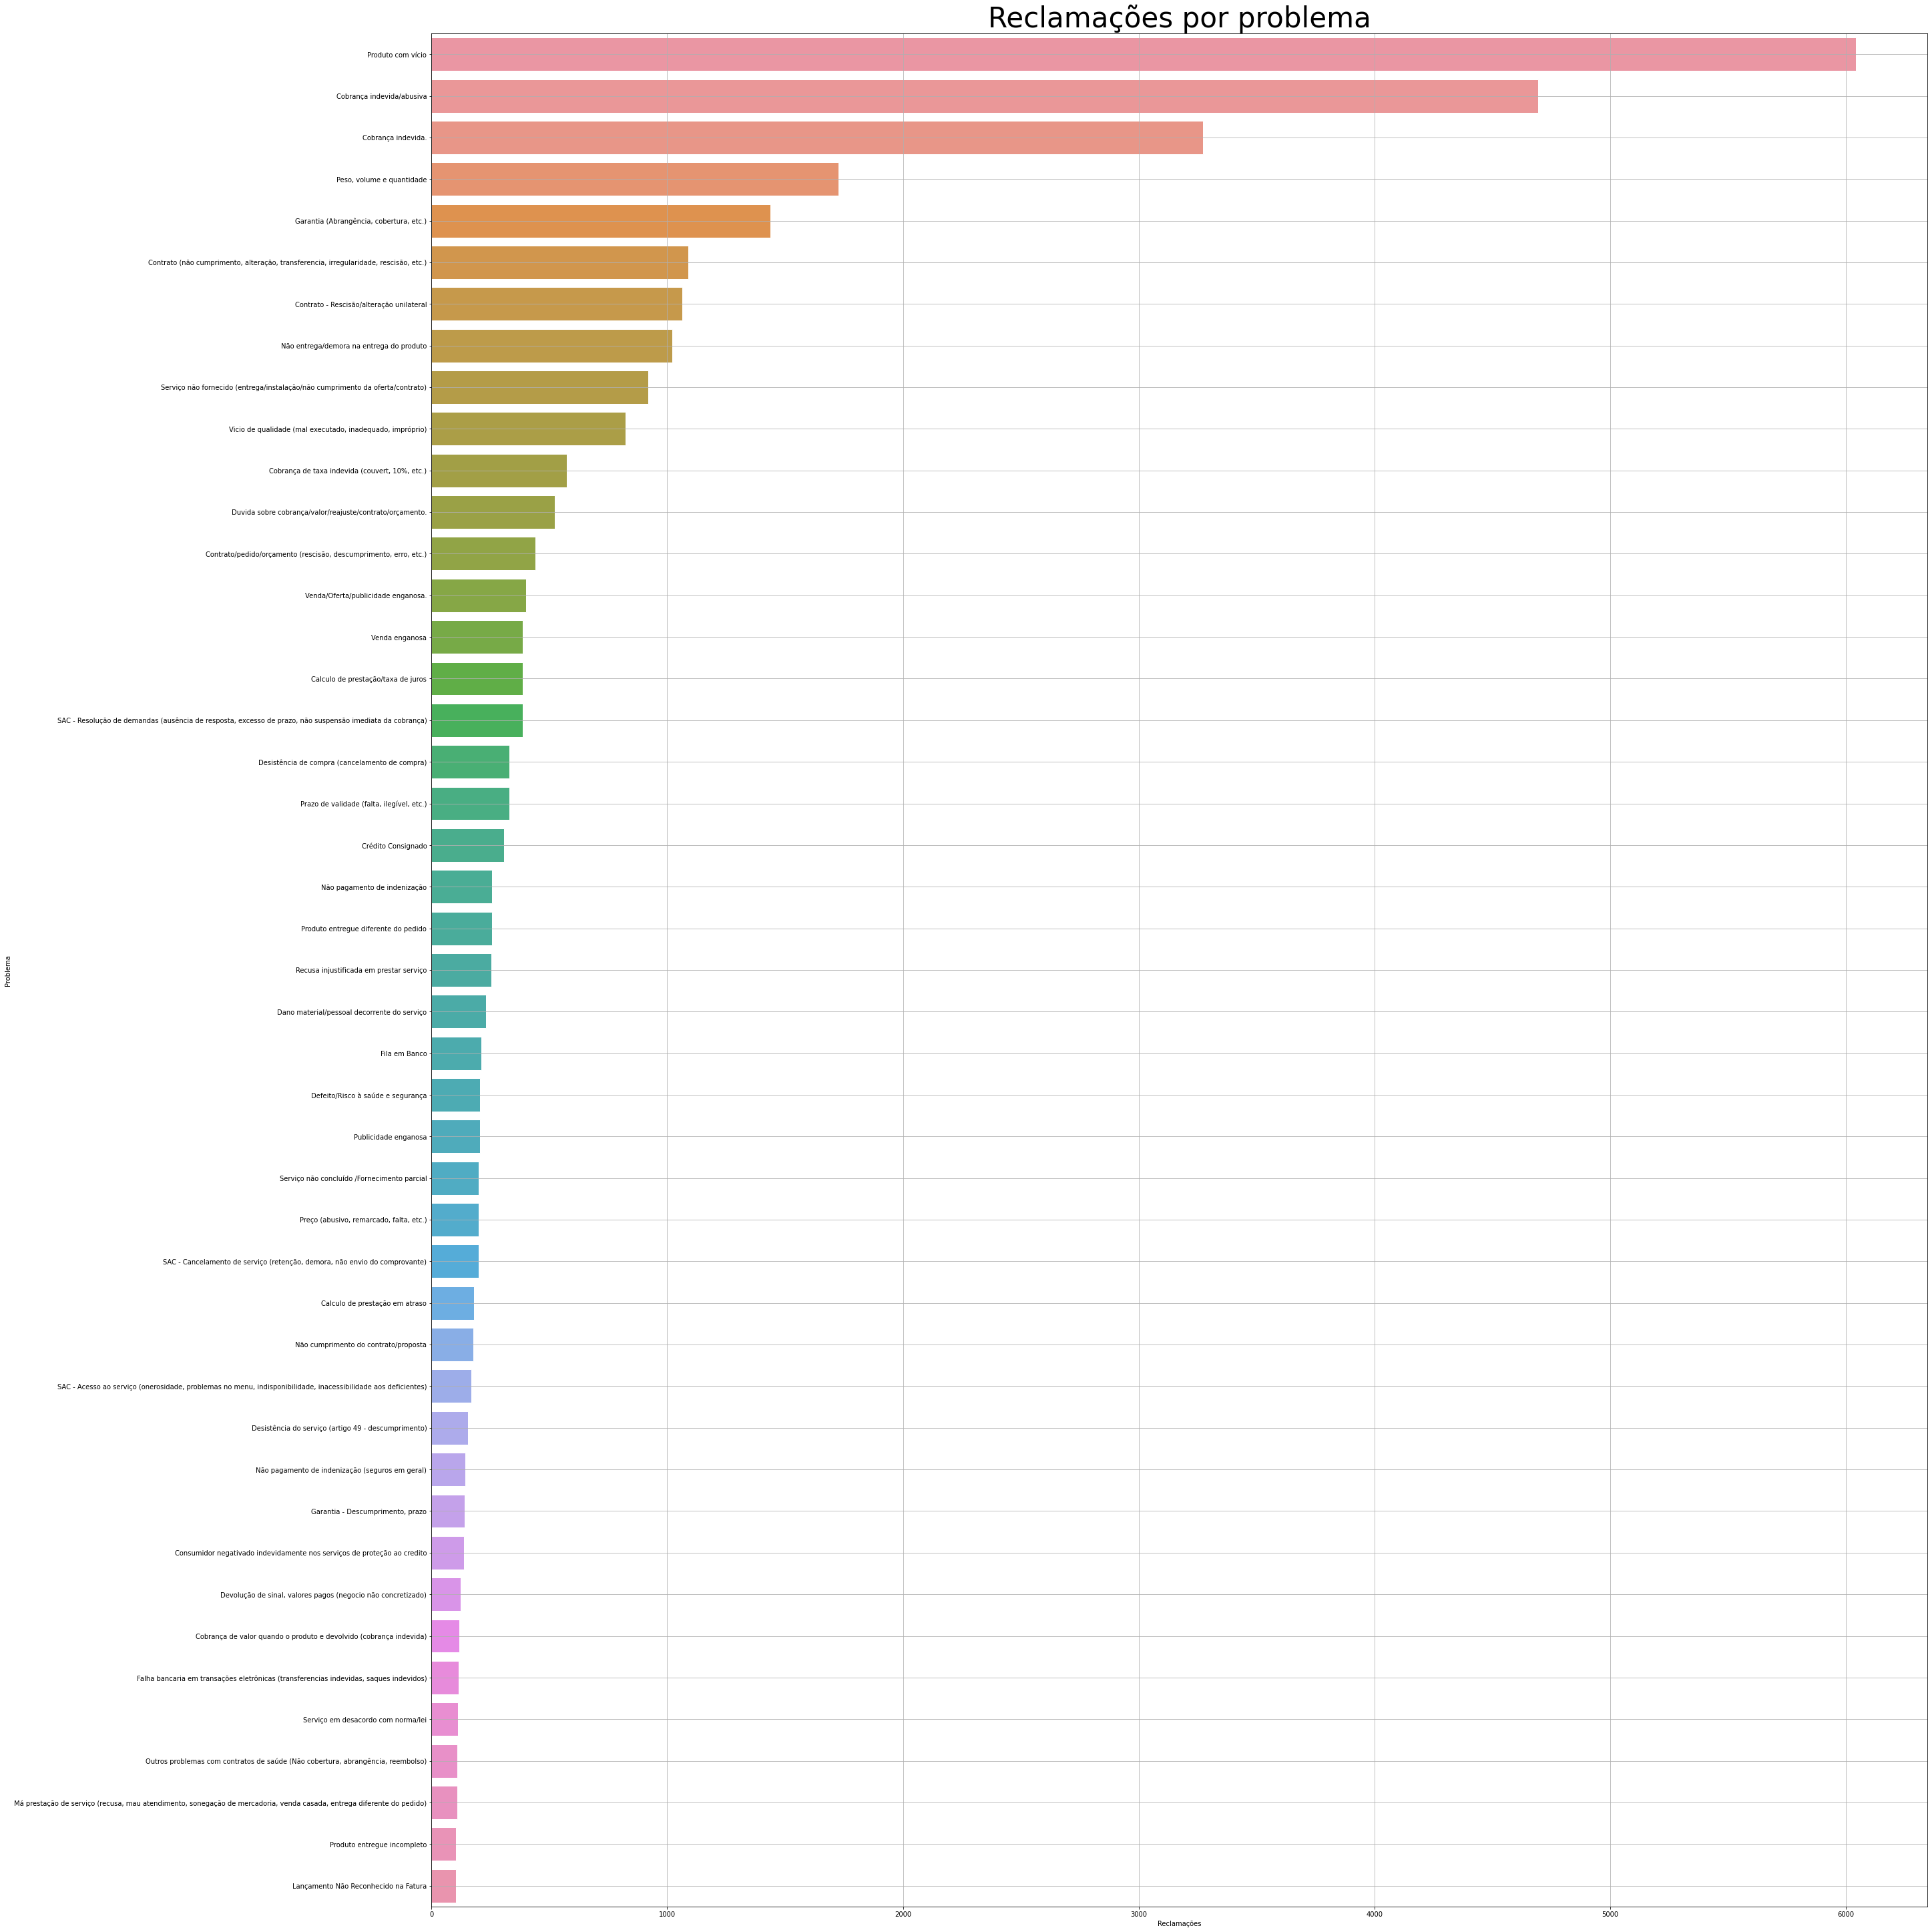

In [0]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=3.5)
# carrega o dataset
sns.countplot(y = "problema", data=df_problema,
              order = df_problema["problema"].value_counts().index[:45])
ax.grid(True)
ax.set_title("Reclamações por problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()

In [0]:
df_problema.isnull().sum()

problema    8936
dtype: int64

In [0]:
df_problema.shape

(33371, 1)

In [0]:
df_problema.dropna(inplace=True)
df_problema.isnull().sum()

problema    0
dtype: int64

In [0]:
data_filtro = data[data.problema.notnull()]

In [0]:
data_filtro.shape

(33371, 8)

In [0]:
data_filtro.head()

Regiao   ...        faixa etarea
0  Sudeste  ...  entre 31 a 40 anos
1  Sudeste  ...     mais de 70 anos
2  Sudeste  ...  entre 31 a 40 anos
3  Sudeste  ...  entre 31 a 40 anos
4  Sudeste  ...  entre 41 a 50 anos

[5 rows x 8 columns]

In [0]:
df_empresa1 = pd.DataFrame()
df_empresa1['empresa'] = data_filtro['empresa']

In [0]:
df_empresa1["Nome Empresa Sem Espaço"] = df_empresa1.replace({'empresa': dicionario},regex=True)

In [0]:
df_empresa1.tail()

empresa                     Nome Empresa Sem Espaço
42302                       B2W COMPANHIA DIGITAL                       B2W_COMPANHIA_DIGITAL
42303                       ADIDAS DO BRASIL LTDA                       ADIDAS_DO_BRASIL_LTDA
42304                   RN COMERCIO VAREJISTA S/A                    RN_COMERCIO_VAREJISTA_SA
42305                            DECOLAR.COM LTDA                             DECOLARCOM_LTDA
42306  ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA  ESAB_ESCOLA_SUPERIOR_ABERTA_DO_BRASIL_LTDA

In [0]:
df_empresa1["Nome Empresa Sem Espaço"] = df_empresa1["Nome Empresa Sem Espaço"].str.lower()

In [0]:
# via varejo e eletropaulo trocaram de posição
print (df_empresa1.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                 1095
claro_sa                                              968
tim_celular_sa                                        655
eletropaulo_metropolitana_eletricidade_de_s_paulo     480
via_varejo_sa                                         394
                                                     ... 
marcos_costa_figueredo__me                              1
marcos_donizeti_de_araujo_07770708800                   1
marcos_elias_tomas                                      1
marcos_liguili_me                                       1
123_viagem_de_turismo_ltda                              1
Length: 8433, dtype: int64


In [0]:
string_empresas1 = " ".join([text for text in df_empresa1["Nome Empresa Sem Espaço"]])




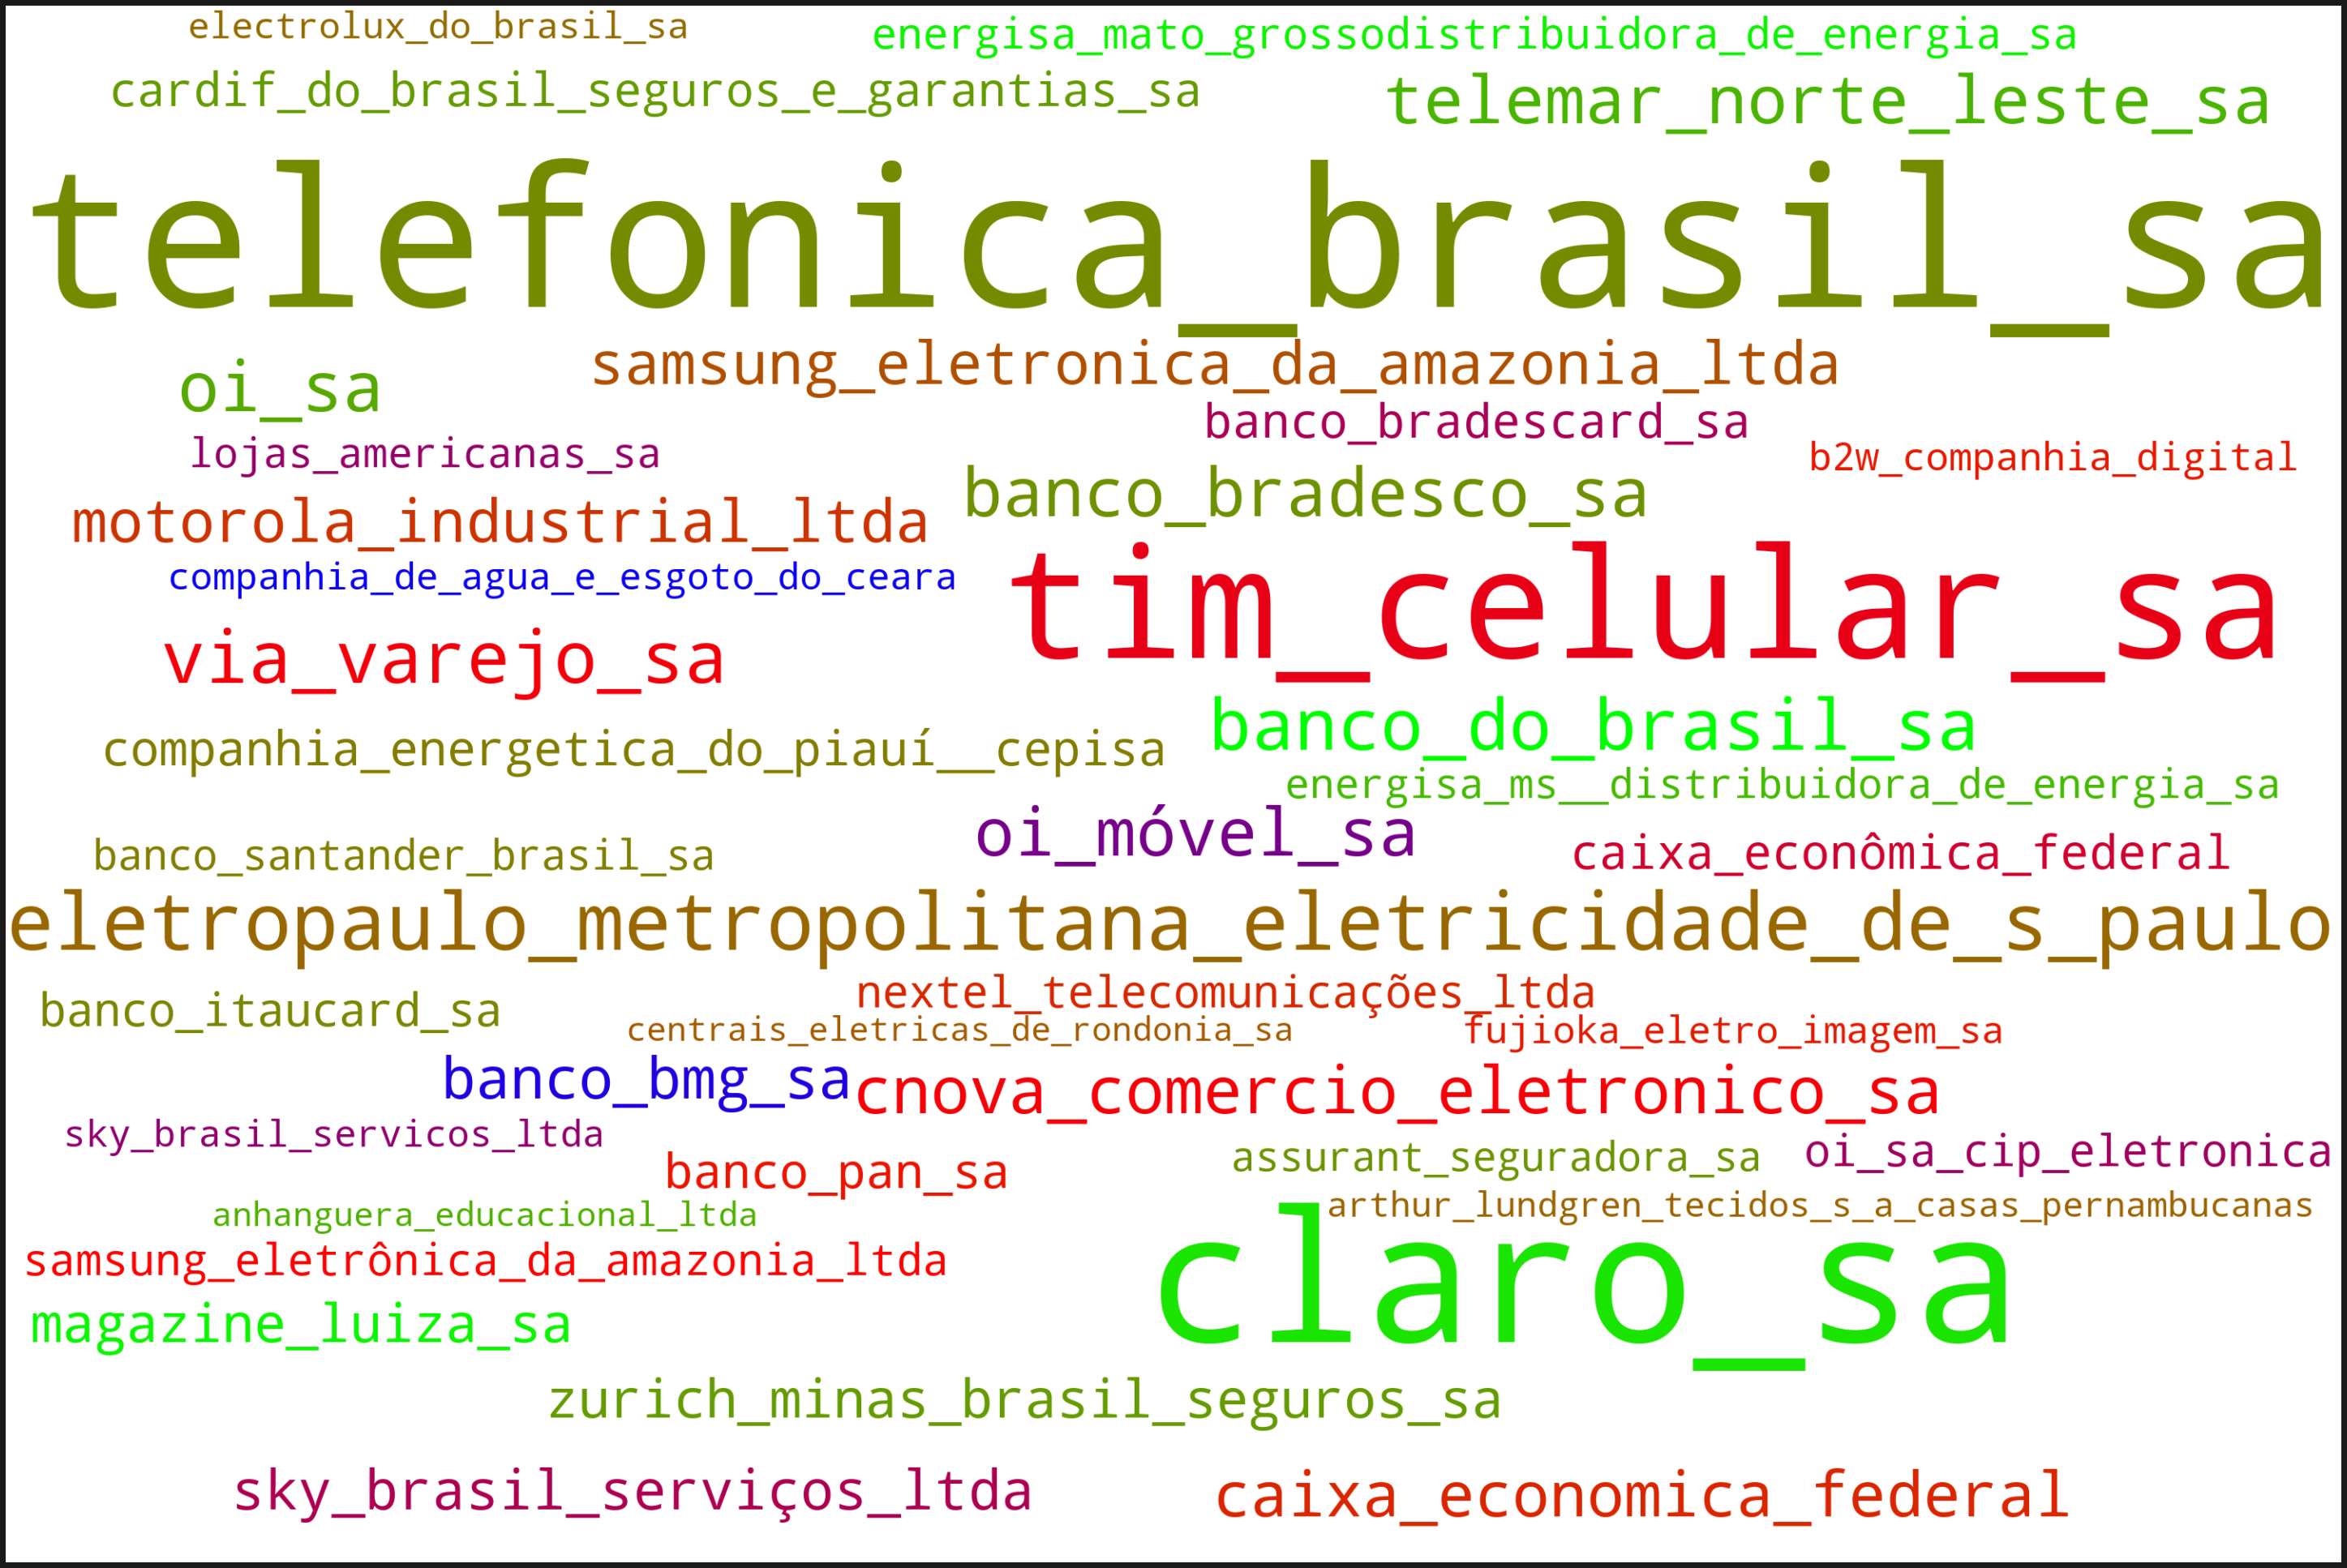

In [0]:
wordcloud_empresas1 = WordCloud(background_color="white",collocations=False,
                              colormap="brg",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas1)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas1, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa1_wordcloud.png")
plt.show()

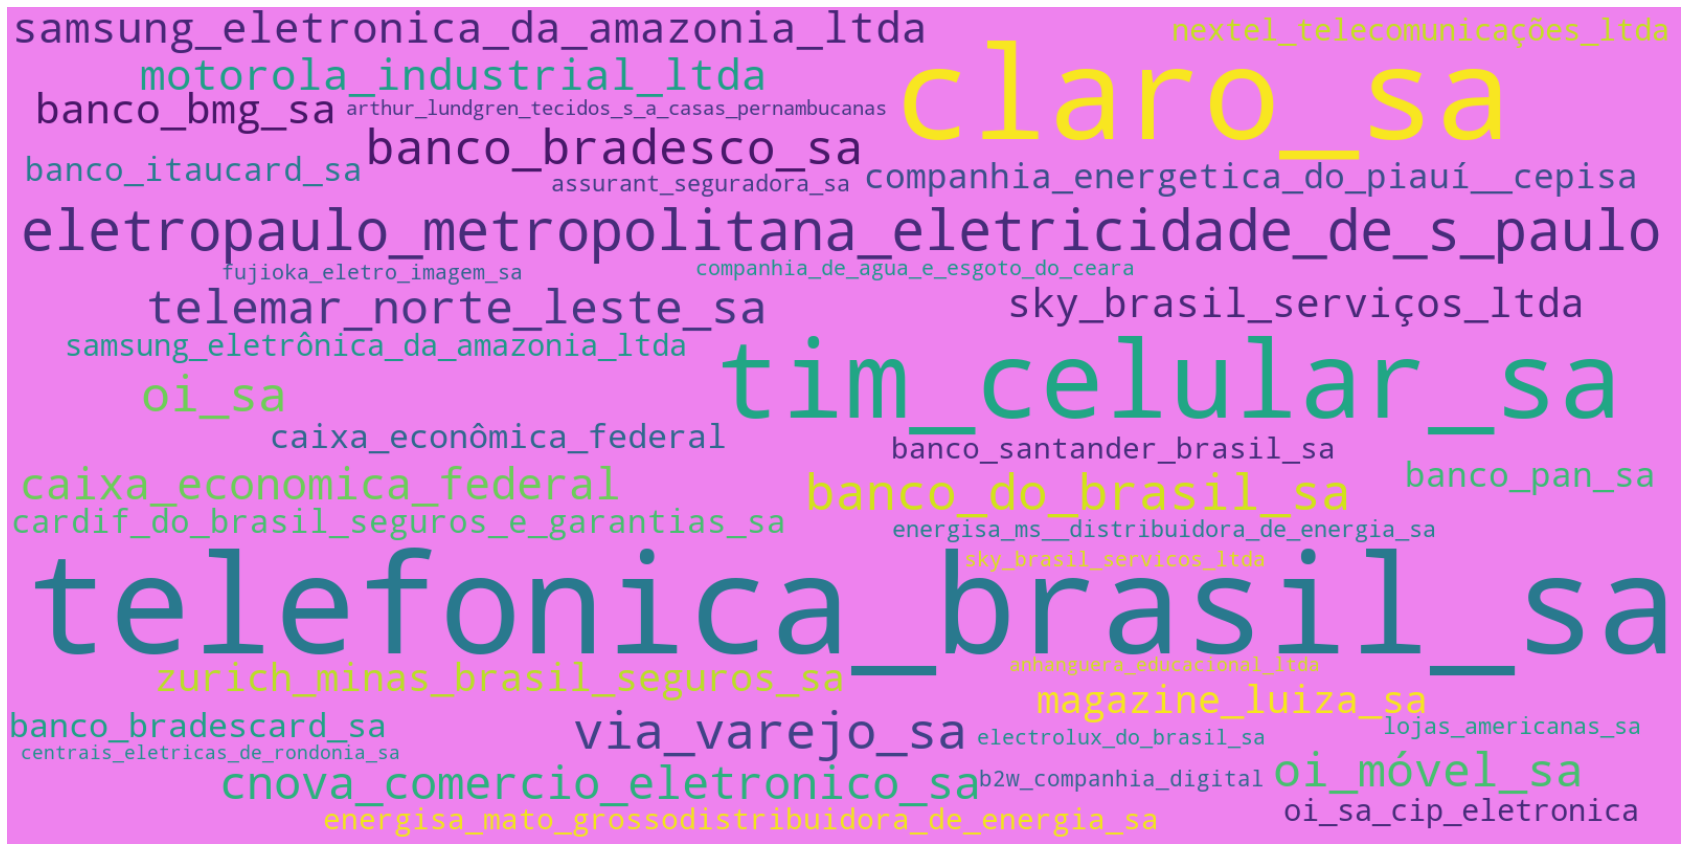

In [0]:
wordcloud = WordCloud(background_color="violet",collocations=False,width=1600, height=800, max_font_size=200, max_words=40).generate(string_empresas1)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()